# SVM Classifier

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit



In [4]:
df= pd.read_csv(r'C:\Users\ROZHIN\Documents\GitHub\finding-criticality\Phase1\main_data.csv')

In [5]:
index= df.columns.tolist()
print(index)
print(df.shape)

['Unnamed: 0', '# of bumps', '# of inflections', 'curvature', 'min i', 'max i', 'x min', 'x max', 'y min', 'y max', 'S', 'criticality']
(8798, 12)


In [6]:
#making color code for the labels
C=[]
Y=df['criticality']
for i in range(len(Y)):
    if Y[i]==1: 
        C.append('g')
    elif Y[i]==2:
        C.append('r')
    else:
        C.append('b')
        
#combining features to make new and more useful features based on visualization of the data (which we'll see an example of later)
df['delta x']= df['x max']-df['x min']
df['delta y']= df['y max']-df['y min']

In [7]:
#Scaling Data
scaler= StandardScaler()
df[['curvature', 'min i', 'max i', 'x min', 'x max', 'y min', 'y max', 'S','delta x','delta y']] = scaler.fit_transform(df[['curvature', 'min i', 'max i', 'x min', 'x max', 'y min', 'y max', 'S','delta x','delta y']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


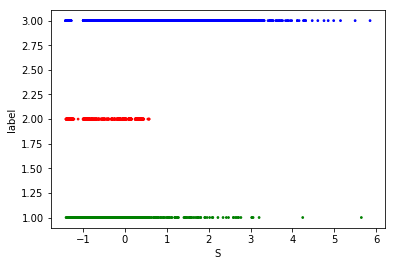

0


In [32]:
#A visualization of a feature features
plt.scatter(df.iloc[:,[10]], df.iloc[:,[11]], c=C,s=3)
plt.ylabel('label')
plt.xlabel('S')
plt.show()
print(df['# of inflections'].min())

In [9]:
#Train_test split

X=df[['min i', 'max i', 'x min', 'x max', 'y min', 'y max', 'S','delta x','delta y']]
Y=df['criticality']

X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=0.2)
#print(X_train.shape[1])

In [10]:
#first prediciton

model = SVC(kernel='rbf')
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.88      0.92      0.90       523
           2       0.59      0.29      0.39       163
           3       0.93      0.98      0.96      1074

   micro avg       0.90      0.90      0.90      1760
   macro avg       0.80      0.73      0.75      1760
weighted avg       0.88      0.90      0.89      1760



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.88      0.92      0.90       523
           2       0.59      0.29      0.39       163
           3       0.93      0.98      0.96      1074

   micro avg       0.90      0.90      0.90      1760
   macro avg       0.80      0.73      0.75      1760
weighted avg       0.88      0.90      0.89      1760



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.88      0.92      0.90       523
           2       0.59      0.29      0.39       163
           3       0.93      0.98      0.96      1074

   micro avg       0.90      0.90      0.90      1760
   macro avg       0.80      0.73      0.75      1760
weighted avg       0.88      0.90      0.89      1760



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.88      0.92      0.90       523
           2       0.59      0.29      0.39       163
           3       0.93      0.98      0.96      1074

   micro avg       0.90      0.90      0.90      1760
   macro avg       0.80      0.73      0.75      1760
weighted avg       0.88      0.90      0.89      1760



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.88      0.92      0.90       523
           2       0.59      0.29      0.39       163
           3       0.93      0.98      0.96      1074

   micro avg       0.90      0.90      0.90      1760
   macro avg       0.80      0.73      0.75      1760
weighted avg       0.88      0.90      0.89      1760



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.88      0.92      0.90       523
           2       0.59      0.29      0.39       163
           3       0.93      0.98      0.96      1074

   micro avg       0.90      0.90      0.90      1760
   macro avg       0.80      0.73      0.75      1760
weighted avg       0.88      0.90      0.89      1760



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.88      0.92      0.90       523
           2       0.59      0.29      0.39       163
           3       0.93      0.98      0.96      1074

   micro avg       0.90      0.90      0.90      1760
   macro avg       0.80      0.73      0.75      1760
weighted avg       0.88      0.90      0.89      1760



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.88      0.92      0.90       523
           2       0.59      0.29      0.39       163
           3       0.93      0.98      0.96      1074

   micro avg       0.90      0.90      0.90      1760
   macro avg       0.80      0.73      0.75      1760
weighted avg       0.88      0.90      0.89      1760

431 ms ± 25.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
#Optimization

param_grid = {'C': [0.01,0.1,1,15,500],
              'gamma': [0.001,0.01,0.5,5,50],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,return_train_score=True , cv=5 , n_jobs=-1)

 
grid.fit(X_train, Y_train)

print(grid.best_params_)
 
print(grid.best_estimator_)

data = pd.DataFrame(grid.cv_results_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.4min finished


{'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}
SVC(C=15, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


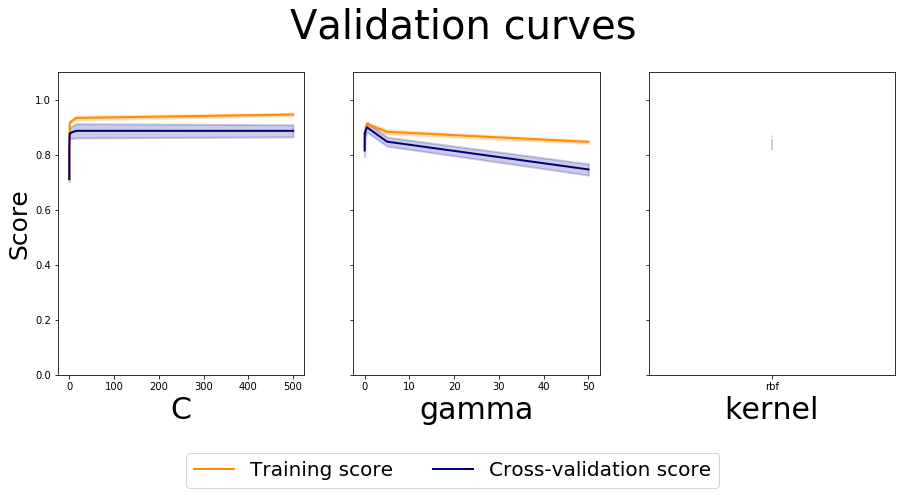

In [28]:
#validation Curves

results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']

def pooled_var(stds):
    n = 5 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

fig, axes = plt.subplots(1, len(param_grid), 
                         figsize = (5*len(param_grid), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)


for idx, (param_name, param_range) in enumerate(param_grid.items()):
    grouped_df = data.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = data.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    axes[idx].set_ylim(0.0, 1.1)
    lw = 2
    axes[idx].plot(param_range, grouped_df['mean_train_score'], label="Training score",
                color="darkorange", lw=lw)
    axes[idx].fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                    grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                    color="darkorange", lw=lw)
    axes[idx].plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                color="navy", lw=lw)
    axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                    color="navy", lw=lw)


handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curve', fontsize=30)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

In [29]:
#Confusion Matrix 

grid_predictions = grid.predict(X_test)
 
print(classification_report(Y_test, grid_predictions))
print(confusion_matrix(Y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.89      0.93      0.91       523
           2       0.65      0.55      0.59       163
           3       0.96      0.97      0.96      1074

   micro avg       0.92      0.92      0.92      1760
   macro avg       0.83      0.81      0.82      1760
weighted avg       0.91      0.92      0.91      1760

[[ 485   22   16]
 [  49   89   25]
 [  10   26 1038]]
